<a href="https://www.kaggle.com/code/theanjalirai/simple-linear-regression-salary-dataset?scriptVersionId=195631830" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Simple linear Regression ( Salary dataset)

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")

In [2]:
print(df)

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

In [3]:
df = df[['YearsExperience' , 'Salary']]

In [4]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


Text(0, 0.5, 'Salary')

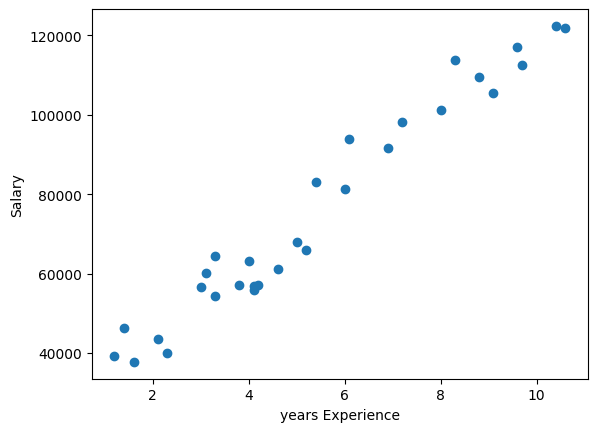

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df.YearsExperience , df.Salary)
plt.xlabel("years Experience")
plt.ylabel("Salary")

**STEPS**
1. divide depependent and independent feature
2. split train - test data
3. standardise the data
4. train the model
5. test the model

In [6]:
X = df[['YearsExperience']]
y = df['Salary']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train,y_test = train_test_split(X,y,test_size = 0.20 , random_state = 42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(24, 1) (6, 1) (24,) (6,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

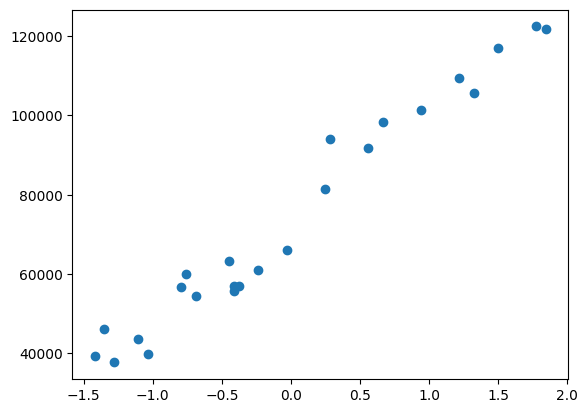

In [9]:
plt.scatter(X_train , y_train)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
print("The slope/ coefficient of YearsExperience is ",regressor.coef_)
print("The intercept: ",regressor.intercept_)

The slope/ coefficient of YearsExperience is  [27151.53742583]
The intercept:  74208.625


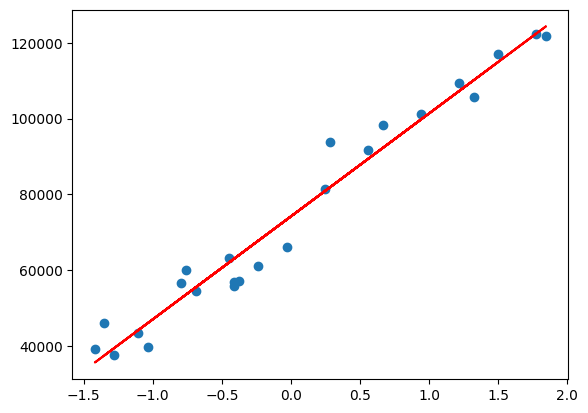

In [12]:
plt.scatter(X_train,y_train)
plt.plot(X_train , regressor.predict(X_train) , c = "r")

In [13]:
Y_pred_test = regressor.predict(X_test)
print(Y_pred_test , y_test)

[115791.21011287  71499.27809463 102597.86866063  75268.80422384
  55478.79204548  60190.69970699] 27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64


**Prediction plot**

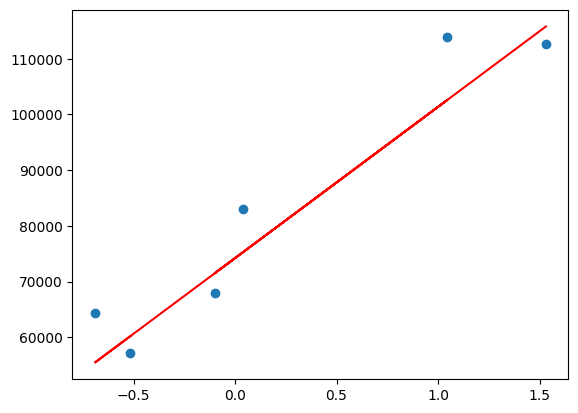

In [14]:
plt.scatter(X_test , y_test)
plt.plot(X_test , regressor.predict(X_test) , "r")

In [15]:
# Performace Matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
mse = mean_squared_error(y_test , Y_pred_test)
mae = mean_absolute_error(y_test , Y_pred_test)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test , Y_pred_test)
ad_r2 = 1-((1-r2_score)*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)

In [16]:
print("mean squared error: ",mse)
print("mean absolute error: ",mae)
print("root mean squared error: ",rmse)
print("R squared: ",r2_score)
print("adjusted R squared: ",ad_r2)

mean squared error:  49830096.85590836
mean absolute error:  6286.453830757742
root mean squared error:  7059.043621901507
R squared:  0.9024461774180498
adjusted R squared:  0.8780577217725622


**NEW DATA POINT**

In [17]:
experience = 11
scaled_experience = scaler.transform([[11]])
scaled_experience[0]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1.98270706])

In [18]:
print("Predicted salary for ",experience, " is ", regressor.predict([scaled_experience[0]]))

Predicted salary for  11  is  [128042.17003281]
